In [ ]:
!pip install keras

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [ ]:
import os
import pandas as pd, numpy as np, random, shutil
import sklearn
import matplotlib.pyplot as plt

import tensorflow_probability as tfp

import yaml

from IPython import display as ipd
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, StratifiedGroupKFold
from sklearn.metrics import roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

import numpy as np
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.utils import class_weight
from sklearn.preprocessing import minmax_scale
import random
import cv2

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Input, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.experimental import CosineDecay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers.experimental.preprocessing import RandomCrop,CenterCrop, RandomRotation

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download <datasets/awsaf49/rsna-bcd-roi-1024x512-png-v2-dataset>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: ` kaggle datasets download <datasets/awsaf49/rsna-bcd-roi-1024x512-png-v2-dataset>'


In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:

import opendatasets as od


In [ ]:
od.download("https://www.kaggle.com/datasets/awsaf49/rsna-bcd-roi-1024x512-png-v2-dataset")

100%|██████████| 11.1G/11.1G [02:16<00:00, 87.3MB/s]


In [ ]:
np.random.seed(10)

train_df = pd.read_csv('/content/rsna-bcd-roi-1024x512-png-v2-dataset/train.csv')

test_df = pd.read_csv('/content/rsna-bcd-roi-1024x512-png-v2-dataset/test.csv')


base_path='/content/rsna-bcd-roi-1024x512-png-v2-dataset/train_images'

# saving image path into train dataframe
train_df['img_path']= f'{base_path}'\
                    + '/' + train_df.patient_id.astype(str)\
                    + '/' + train_df.image_id.astype(str)\
                    + '.png'



display(train_df.head(3))

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,image_path,width,height,img_path
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,/tmp/dataset/part0/train_images/10006/46282261...,223,646,/content/rsna-bcd-roi-1024x512-png-v2-dataset/...
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,/tmp/dataset/part0/train_images/10006/14595417...,257,1022,/content/rsna-bcd-roi-1024x512-png-v2-dataset/...
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,/tmp/dataset/part0/train_images/10006/18645908...,227,795,/content/rsna-bcd-roi-1024x512-png-v2-dataset/...


In [ ]:
train_df.isnull().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
image_path                     0
width                          0
height                         0
img_path                       0
dtype: int64

In [ ]:
train_df['age'] = train_df['age']. fillna(train_df['age'].mean())
train_df.dropna (subset=['density','BIRADS'],inplace=True)
train_df.isnull().sum()

site_id                    0
patient_id                 0
image_id                   0
laterality                 0
view                       0
age                        0
cancer                     0
biopsy                     0
invasive                   0
BIRADS                     0
implant                    0
density                    0
machine_id                 0
difficult_negative_case    0
image_path                 0
width                      0
height                     0
img_path                   0
dtype: int64

0    23012
1      664
Name: cancer, dtype: int64


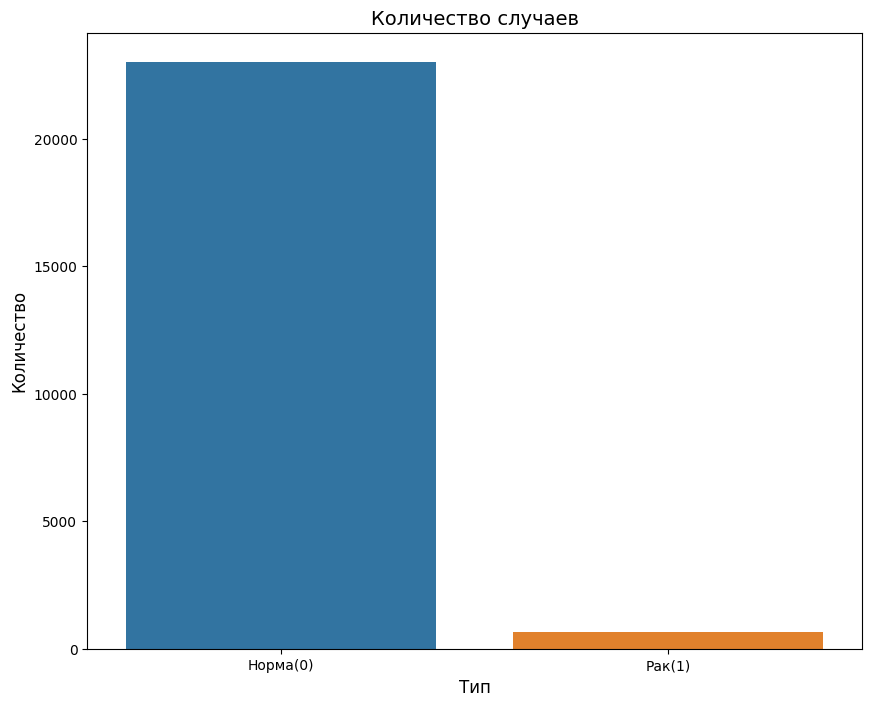

In [ ]:
# количество случаев
cases_count = train_df['cancer'].value_counts()
print(cases_count)

plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Количество случаев', fontsize=14)
plt.xlabel('Тип', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Норма(0)', 'Рак(1)'])
plt.show()

In [ ]:
import seaborn as sn

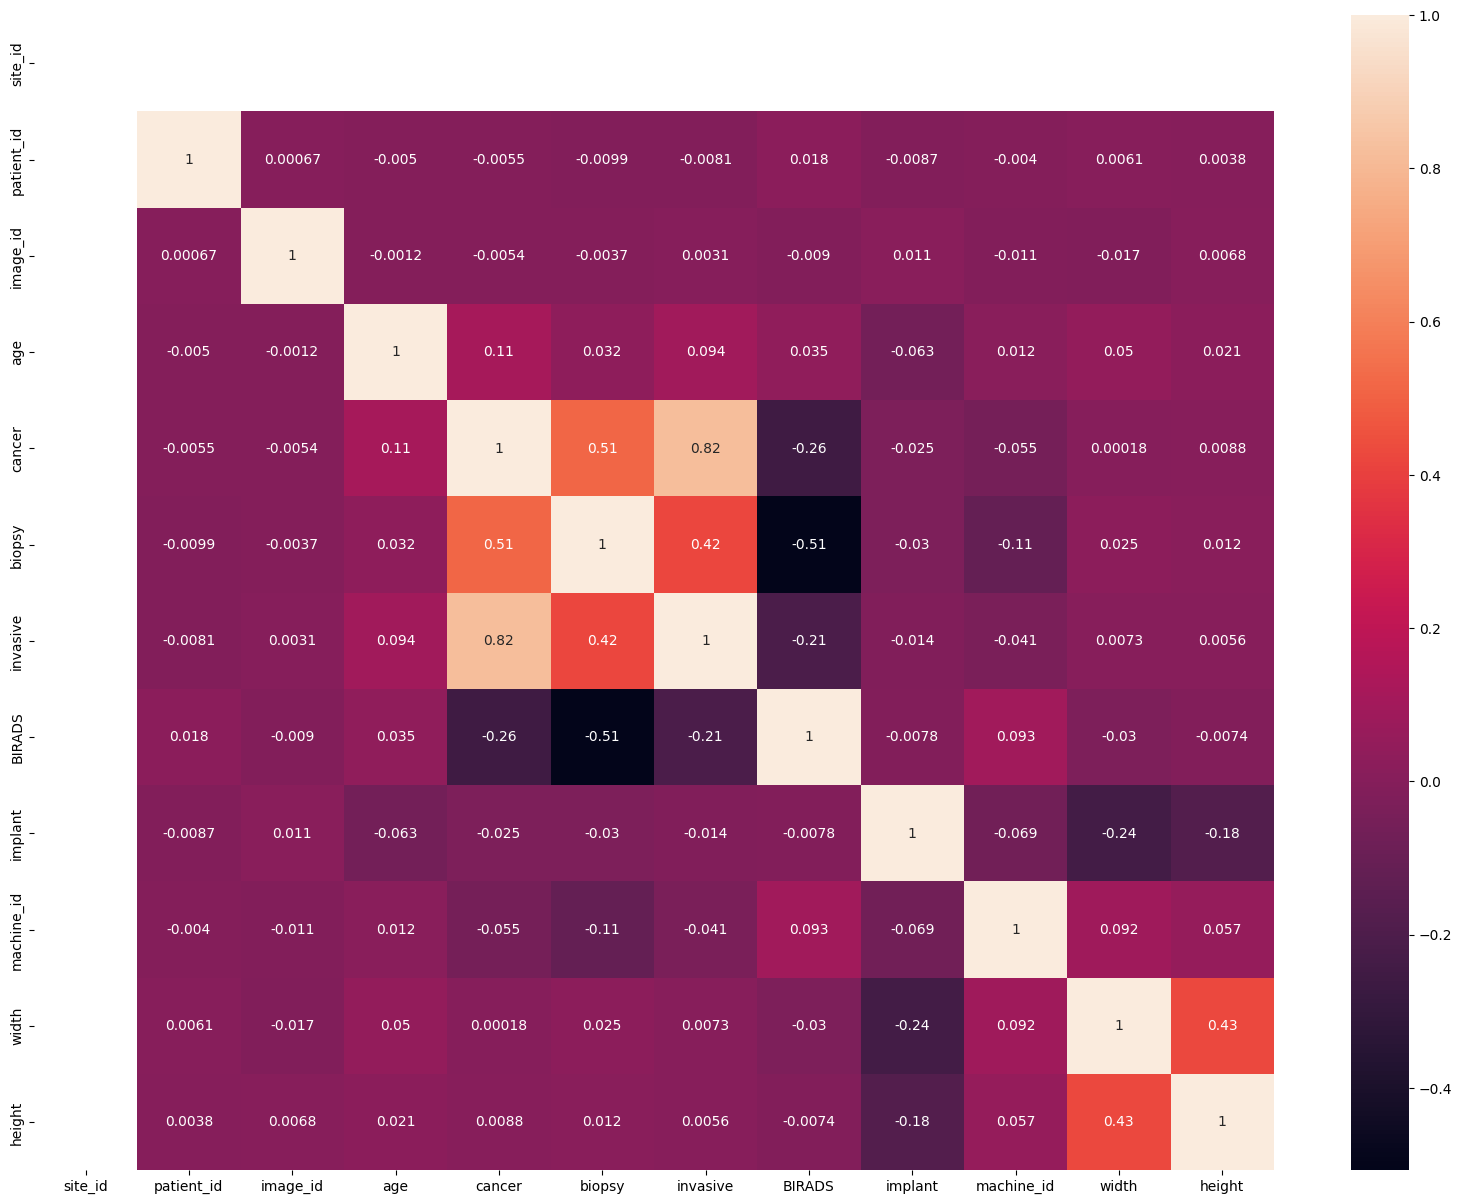

In [ ]:
#корреляция
numeric_columns = train_df.select_dtypes(include=[ 'int64','float64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(20, 15))
sn.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
#взаимосвязь данных
numeric_columns = train_df.select_dtypes(include=['int64', 'float64'])


corr_matrix = numeric_columns.corr()


cancer_correlations = corr_matrix['cancer'].sort_values(ascending=False)

print(cancer_correlations)

cancer        1.000000
invasive      0.819431
biopsy        0.511352
age           0.112954
height        0.008842
width         0.000182
image_id     -0.005436
patient_id   -0.005513
implant      -0.024710
machine_id   -0.054537
BIRADS       -0.259431
site_id            NaN
Name: cancer, dtype: float64


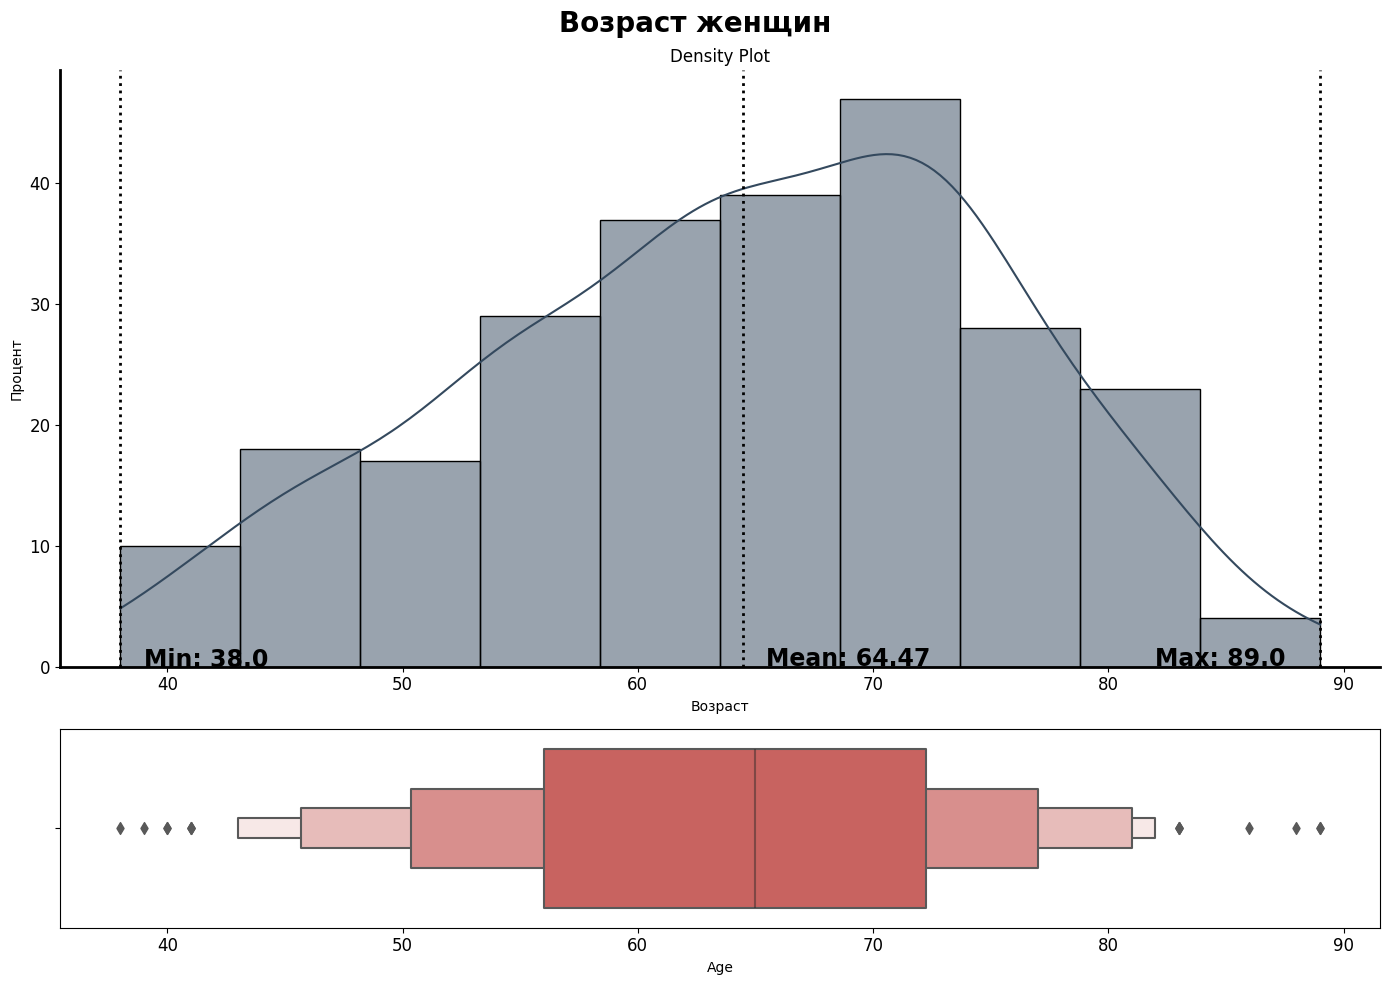

In [ ]:
import seaborn as sn
ages = train_df.groupby('patient_id')['age'].apply(lambda x: x.unique()[0])
cancer_ages = train_df[train_df['cancer'] == 1].groupby('patient_id')['age'].apply(lambda x: x.unique()[0])
no_cancer_ages = train_df[train_df['cancer'] == 0].groupby('patient_id')['age'].apply(lambda x: x.unique()[0])
my_colors = ["#f0ad4e", "#5cb85c", "#d9534f", "#428bca", "#9b59b6", "#34495e"]

f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(14, 10))
sn.histplot(data=cancer_ages, kde=True, color=my_colors[5], ax=a0)

a0.axvline(x=cancer_ages.mean(), ls=":", lw=2, color="black")
a0.text(x=cancer_ages.mean()+1, y=0.018, s=f"Mean: {cancer_ages.mean():.2f}", size=17, color="black", weight="bold")
a0.axvline(x=cancer_ages.min(), ls=":", lw=2, color="black")
a0.text(x=cancer_ages.min()+1, y=0.008, s=f"Min: {cancer_ages.min()}", size=17, color="black", weight="bold")
a0.axvline(x=cancer_ages.max(), ls=":", lw=2, color="black")
a0.text(x=cancer_ages.max()-7, y=0.037, s=f"Max: {cancer_ages.max()}", size=17, color="black", weight="bold")

sn.boxenplot(x=cancer_ages, ax=a1, color=my_colors[2])
a1.set(xlabel="Age", ylabel="")
a1.tick_params(labelsize=12)

plt.suptitle("Возраст женщин", weight="bold", size=20)
a0.set(title="Density Plot")
a0.set(xlabel="Возраст", ylabel="Процент")
a0.tick_params(labelsize=12)
a0.spines["top"].set_visible(False)
a0.spines["right"].set_visible(False)
a0.spines["left"].set_linewidth(2)
a0.spines["bottom"].set_linewidth(2)

plt.tight_layout()
plt.show()

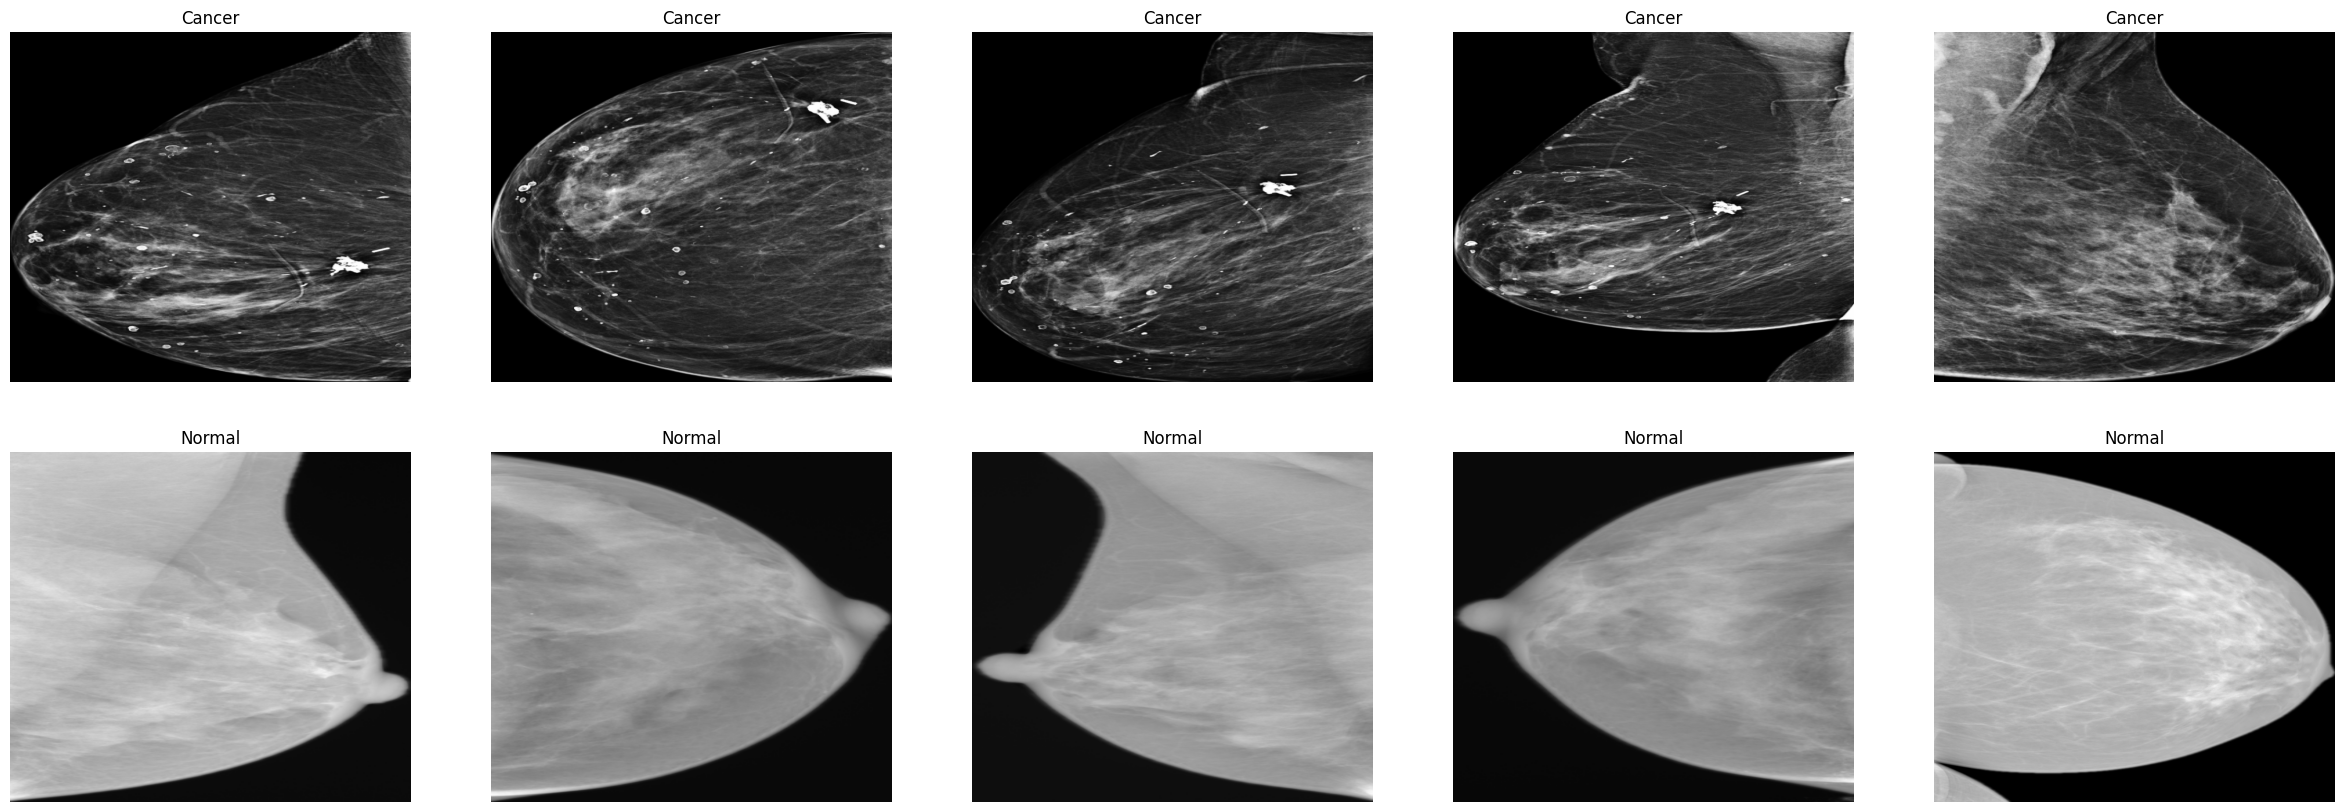

In [ ]:
Cancer_samples = (train_df[train_df['cancer']==1]['img_path'].iloc[0:5]).tolist()
Normal_samples = (train_df[train_df['cancer']==0]['img_path'].iloc[0:5]).tolist()
#обЪединим
samples = Cancer_samples + Normal_samples

f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = tf.keras.preprocessing.image.load_img(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Cancer")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
# увеличим разнообразие обучающей выборки путем применения случайных (но реалистичных) преобразований.
import tensorflow as tf
data_augmentation_layers = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.RandomCrop (height=224, width=224),
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.25),
        layers.experimental.preprocessing.RandomZoom((-0.2,0)),
        layers.experimental.preprocessing.RandomContrast((0.2,0.2))
])

(1, 1024, 512, 3)
augmented_image  (1, 224, 224, 3)
augmented_image  (1, 224, 224, 3)


augmented_image  (1, 224, 224, 3)
augmented_image  (1, 224, 224, 3)
augmented_image  (1, 224, 224, 3)


augmented_image  (1, 224, 224, 3)


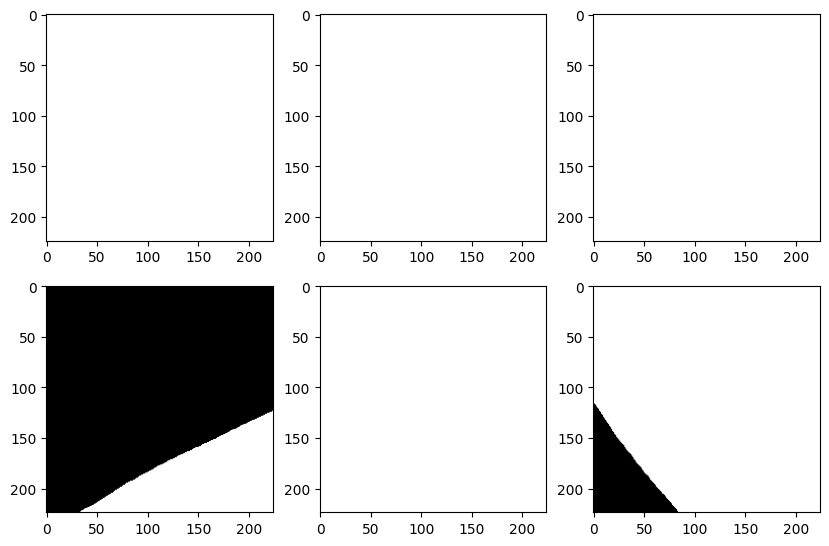

In [ ]:
image = tf.keras.preprocessing.image.load_img(train_df['img_path'][20])


image = tf.expand_dims(np.array(image), 0)

print(image.shape)

plt.figure(figsize=(10, 10))
for i in range(6):
  augmented_image = data_augmentation_layers(image)
  print('augmented_image ',augmented_image.shape)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])


In [ ]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, df, path, batch_size=32, shuffle=True,aug=True,labels=True):
        self.df = df.copy()
        if 'prediction_id' not in df:
            self.df['prediction_id'] = df["patient_id"].astype(str) + '_' + df["laterality"].astype(str)

        self.prediction_ids = self.df['prediction_id'].unique()
        self.labels = labels
        if self.labels ==True:
            self.labels = self.df.groupby('prediction_id')['cancer'].max()
        self.path = path
        self.batch_size = batch_size
        self.aug=aug
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        #количество батчей за эпоху
        return int(len(self.prediction_ids) / self.batch_size)

    def __getitem__(self, index):
        #генерируем батч
        batch_indexes = self.prediction_ids[index * self.batch_size:(index + 1) * self.batch_size]
        X, y = self.__data_generation(batch_indexes)
        return X, y

    def __get_input(self, path):


        image = tf.keras.preprocessing.image.load_img(path)
        image_arr = tf.keras.preprocessing.image.img_to_array(image)

        if self.aug:

             image_arr=self.augmentor(image_arr)


        return image_arr


    def augmentor(self, images):
        #подключаем увеличенные данные
        images=data_augmentation_layers(images)

        return images


    def on_epoch_end(self):
        #после каждой эпохи индексы обновляются
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)

    def __data_generation(self, batch_indexes):
        paths = self.get_paths_images(batch_indexes)
        X = np.asarray([self.__get_input(path) for path in paths])
        y = np.array([self.labels[batch_indexes]])
        return X, y

    def get_paths_images(self, batch_indexes):
        batch = self.df[self.df['prediction_id'].isin(batch_indexes)]
        rows_batch = self.get_rows(batch)
        return self.path + rows_batch["patient_id"].astype(str) + "/" + rows_batch["image_id"].astype(
            str) + ".png"

    def get_rows(self, batch):
        #выбираем только одно изображение MLO проекции ""
        only_MLO_view_images = batch[batch['view'] == 'MLO']
        only_one_per_prediction_id = only_MLO_view_images.groupby('prediction_id')[['patient_id', 'image_id']].max()
        return only_one_per_prediction_id

In [ ]:
np.random.seed(0)

batch_size=8
epochs=2
img_path='/content/rsna-bcd-roi-1024x512-png-v2-dataset/train_images/'

def get_train_val_generator(train_size=0.8, batch_size=batch_size, filename=train_df, image_dir=img_path):

    patient_ids = train_df["patient_id"].unique()
    np.random.shuffle(patient_ids)
    train_size = int(len(patient_ids) * train_size)
    train_ids = patient_ids[:train_size]
    val_ids = patient_ids[train_size:]

    df_train = train_df[train_df['patient_id'].isin(train_ids)]
    df_val = train_df[train_df['patient_id'].isin(val_ids)]

    train_gen = DataGenerator(df_train, batch_size=batch_size, path=image_dir,aug=True)
    val_gen = DataGenerator(df_val, batch_size=batch_size, path=image_dir,aug=False)

    return train_gen, val_gen

dataset_path=train_df
image_dir=img_path
train_gen, val_gen = get_train_val_generator(filename=dataset_path, image_dir=image_dir)

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
base_model = VGG19(weights='imagenet',
                         include_top=False,
                         input_shape=(224, 224, 3))

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

In [ ]:
# фиксируем все веса предобученной сети
for layer in base_model.layers:
    layer.trainable = False

x = base_model.layers[-6].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='sigmoid')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(1,
                          activation='sigmoid',
                          kernel_regularizer=tf.keras.regularizers.l1(1e-4))(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x, name='cancer_or_normal')

In [ ]:
model.summary()

Model: "cancer_or_normal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)  

In [ ]:
tensorboard1 = TensorBoard(log_dir = 'logs')
checkpoint1 = ModelCheckpoint("vgg19",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr1 = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.0001,
                              mode='auto',verbose=1)

In [ ]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_gen, validation_data=val_gen, epochs=1,callbacks=[tensorboard1,checkpoint1,reduce_lr1])

937/937 [==============================] - ETA: 0s - loss: 0.1646 - accuracy: 0.9560

InvalidArgumentError: ignored

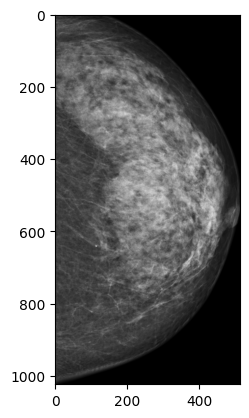

In [ ]:
#тестовая выборка
DF_PATH = 'rsna-bcd-roi-1024x512-png-v2-dataset'
df = pd.read_csv("rsna-bcd-roi-1024x512-png-v2-dataset/test.csv")

test_path='rsna-bcd-roi-1024x512-png-v2-dataset/test_images/'

test_dir = f'{test_path}'




test_df['img_path']= f'{test_dir}/'\
                    + '/' + test_df.patient_id.astype(str)\
                    + '/' + test_df.image_id.astype(str)\
                    + '.png'


test_df
image1 = tf.keras.preprocessing.image.load_img(test_df['img_path'][1])

plt.imshow(image1)



In [ ]:
preds=[]
for i in range (len(test_df['img_path'])):

    image = tf.keras.preprocessing.image.load_img(test_df['img_path'][i])

    image=tf.expand_dims(np.array(image), 0)
    pred=model.predict

    preds.append(pred)

In [ ]:
pred_df = pd.DataFrame({'prediction_id':test_df.prediction_id,
                        'cancer':preds})


In [ ]:
submission = pd.DataFrame(data={'prediction_id': test_df['prediction_id'], 'cancer': np.random.rand(test_df.shape[0])}).drop_duplicates(subset='prediction_id')
submission.head()

,prediction_id,cancer
0,10008_L,0.182900
2,10008_R,0.277338
